In [1]:
import os

BASE_DIR = r'D:\Purwadhika\JCAIEAH\Capstone\M4'

DATASET_PATH   = os.path.join(BASE_DIR, 'dataset')
MODEL_SAVE_DIR = os.path.join(BASE_DIR, 'Trainlocal', 'models')

RUN_NAME       = 'capsa'

print('=' * 20)
print('Setup Path selesai!')
print('=' * 20)
print(f'   Dataset path   : {DATASET_PATH}')
print(f'   Model save dir : {MODEL_SAVE_DIR}')
print(f'   Run name       : {RUN_NAME}')

Setup Path selesai!
   Dataset path   : D:\Purwadhika\JCAIEAH\Capstone\M4\dataset
   Model save dir : D:\Purwadhika\JCAIEAH\Capstone\M4\Trainlocal\models
   Run name       : capsa


In [2]:
import torch

print('=' * 15)
print('CEK GPU & CUDA')
print('=' * 15)

if not torch.cuda.is_available():
    print('GPU tidak terdeteksi!')
    DEVICE = 'cpu'
else:
    gpu_name = torch.cuda.get_device_name(0)
    vram     = torch.cuda.get_device_properties(0).total_memory / 1024**3
    print(f' GPU terdeteksi!')
    print(f'   Nama GPU     : {gpu_name}')
    print(f'   VRAM         : {vram:.1f} GB')
    print(f'   CUDA Version : {torch.version.cuda}')
    print(f'   PyTorch      : {torch.__version__}')
    DEVICE = 0


CEK GPU & CUDA
 GPU terdeteksi!
   Nama GPU     : NVIDIA GeForce RTX 4060
   VRAM         : 8.0 GB
   CUDA Version : 12.4
   PyTorch      : 2.6.0+cu124


In [5]:
%pip install pyyaml

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from pathlib import Path
import yaml

yaml_path = Path(DATASET_PATH) / 'data.yaml'
with open(yaml_path, 'r') as f:
    config = yaml.safe_load(f)

config['path']  = DATASET_PATH
config['train'] = 'train/images'
config['val']   = 'valid/images'
config['test']  = 'test/images'

with open(f"{DATASET_PATH}/data.yaml", 'w') as f:
    yaml.dump(config, f, sort_keys=False)

YAML_PATH   = f"{DATASET_PATH}/data.yaml"
CLASS_NAMES = config['names']

print("✅ data.yaml berhasil diupdate!")
print(f"   path  : {config['path']}")
print(f"   train : {config['train']}")
print(f"   val   : {config['val']}")
print(f"   test  : {config['test']}")
print(f"   nc    : {config['nc']}")
print(f"   names : {config['names']}")


✅ data.yaml berhasil diupdate!
   path  : D:\Purwadhika\JCAIEAH\Capstone\M4\dataset
   train : train/images
   val   : valid/images
   test  : test/images
   nc    : 52
   names : ['10C', '10D', '10H', '10S', '2C', '2D', '2H', '2S', '3C', '3D', '3H', '3S', '4C', '4D', '4H', '4S', '5C', '5D', '5H', '5S', '6C', '6D', '6H', '6S', '7C', '7D', '7H', '7S', '8C', '8D', '8H', '8S', '9C', '9D', '9H', '9S', 'AC', 'AD', 'AH', 'AS', 'JC', 'JD', 'JH', 'JS', 'KC', 'KD', 'KH', 'KS', 'QC', 'QD', 'QH', 'QS']


In [ ]:
from collections import Counter

print("=== DISTRIBUSI DATA PER SPLIT ===")
for split in ['train', 'valid', 'test']:
    img_path   = Path(f"{DATASET_PATH}/{split}/images")
    label_path = Path(f"{DATASET_PATH}/{split}/labels")

    if not img_path.exists():
        print(f"  {split:6s} → folder tidak ditemukan")
        continue

    n_img = len(list(img_path.glob('*.jpg'))) + len(list(img_path.glob('*.png')))
    n_lbl = len(list(label_path.glob('*.txt'))) if label_path.exists() else 0
    print(f"  {split:6s} → {n_img:4d} gambar | {n_lbl:4d} label")

print("\n=== DISTRIBUSI KELAS (TRAIN) ===")
label_dir = Path(f"{DATASET_PATH}/train/labels")
counter   = Counter()
for lbl_file in label_dir.glob('*.txt'):
    with open(lbl_file) as f:
        for line in f:
            cls_id = int(line.strip().split()[0])
            counter[CLASS_NAMES[cls_id]] += 1

for cls, count in sorted(counter.items(), key=lambda x: -x[1]):
    bar   = '█' * (count // 5)
    print(f"  {cls:20s}: {count:4d}  {bar}")

=== DISTRIBUSI DATA PER SPLIT ===
  train  → 1376 gambar | 1376 label
  valid  →  420 gambar |  420 label
  test   →  204 gambar |  204 label

=== DISTRIBUSI KELAS (TRAIN) ===
  8H                  :  144  ████████████████████████████
  KD                  :  131  ██████████████████████████
  7H                  :  128  █████████████████████████
  QS                  :  125  █████████████████████████
  3C                  :  125  █████████████████████████
  10D                 :  122  ████████████████████████
  KS                  :  118  ███████████████████████
  8D                  :  117  ███████████████████████
  5C                  :  117  ███████████████████████
  3D                  :  116  ███████████████████████
  6D                  :  115  ███████████████████████
  QC                  :  113  ██████████████████████
  9D                  :  113  ██████████████████████
  9H                  :  112  ██████████████████████
  3H                  :  112  ██████████████████████
  6

In [11]:
%pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from pathlib import Path

label_dir = Path(f"{DATASET_PATH}/train/labels")
sample_label = list(label_dir.glob('*.txt'))[0]

with open(sample_label) as f:
    lines = f.readlines()

print(f"File: {sample_label.name}")
print(f"Jumlah baris: {len(lines)}")
print(f"\nIsi label:")
for line in lines[:3]:
    parts = line.strip().split()
    print(f"  Jumlah nilai: {len(parts)} → {parts}")

File: 019951084_jpg.rf.caf98ecb4aa8d04f26be66f53c6bc397.txt
Jumlah baris: 4

Isi label:
  Jumlah nilai: 5 → ['51', '0.559375', '0.49140625', '0.04140625', '0.0640625']
  Jumlah nilai: 5 → ['36', '0.4890625', '0.503125', '0.03359375', '0.065625']
  Jumlah nilai: 5 → ['50', '0.41640625', '0.4953125', '0.03359375', '0.065625']


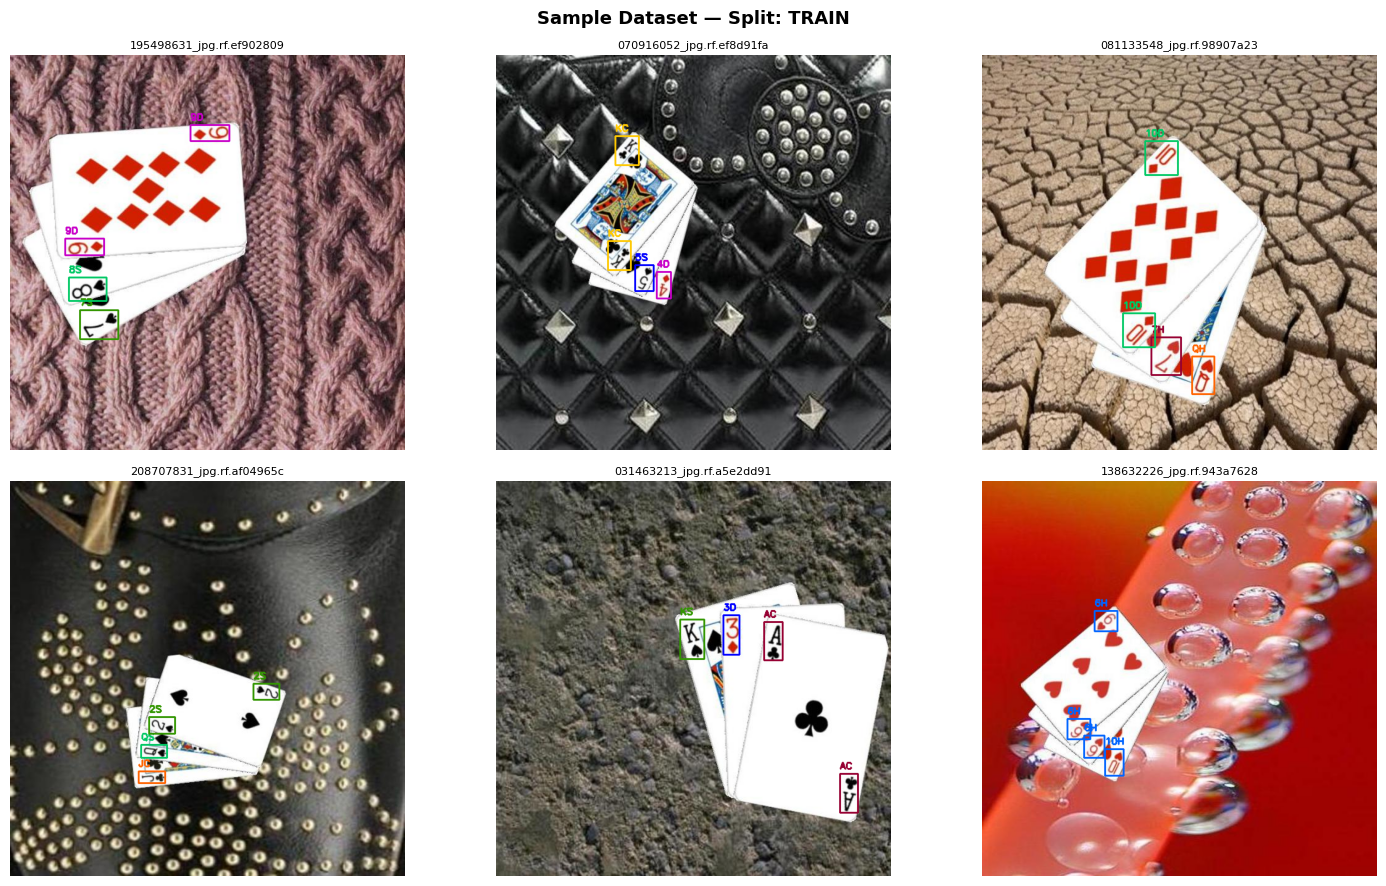

In [ ]:
import cv2
import matplotlib.pyplot as plt
import random
from pathlib import Path

def visualize_samples(split='train', n=6):
    img_dir   = Path(f"{DATASET_PATH}/{split}/images")
    label_dir = Path(f"{DATASET_PATH}/{split}/labels")

    all_images = list(img_dir.glob('*.*'))
    images     = random.sample(all_images, min(n, len(all_images)))
    colors     = [(255,100,0),(0,200,100),(0,100,255),(200,0,200),
                  (255,200,0),(0,200,255),(150,0,50),(50,150,0),
                  (100,100,200),(0,0,255)]

    fig, axes = plt.subplots(2, 3, figsize=(15, 9))
    axes = axes.flatten()

    for ax, img_path in zip(axes, images):
        img = cv2.imread(str(img_path))
        if img is None:
            continue
        img  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        h, w = img.shape[:2]

        label_path = label_dir / (img_path.stem + '.txt')
        if label_path.exists():
            with open(label_path) as f:
                for line in f:
                    parts = line.strip().split()
                    if len(parts) != 5:   # ← pastikan 5 nilai
                        continue

                    cls_id         = int(parts[0])
                    cx, cy, bw, bh = map(float, parts[1:])

                    # Convert dari format YOLO ke pixel
                    x1 = int((cx - bw/2) * w)
                    y1 = int((cy - bh/2) * h)
                    x2 = int((cx + bw/2) * w)
                    y2 = int((cy + bh/2) * h)

                    color = colors[cls_id % len(colors)]
                    cv2.rectangle(img, (x1,y1), (x2,y2), color, 2)
                    cv2.putText(img, CLASS_NAMES[cls_id], (x1, y1-8),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        ax.imshow(img)
        ax.axis('off')
        ax.set_title(img_path.stem[:25], fontsize=8)

    for ax in axes[len(images):]:
        ax.axis('off')

    plt.suptitle(f'Sample Dataset — Split: {split.upper()}',
                 fontsize=13, fontweight='bold')
    plt.tight_layout()
    plt.show()

visualize_samples('train')

In [21]:
%pip install ultralytics

  Using cached ultralytics-8.4.14-py3-none-any.whl.metadata (39 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------------ ------------------------- 20.5/61.0 kB 640.0 kB/s eta 0:00:01
     ------------------------------- ------ 51.2/61.0 kB 871.5 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 804.9 kB/s eta 0:00:00
  Using cached polars-1.38.1-py3-none-any.whl.metadata (10 kB)
  Using cached ultralytics_thop-2.0.18-py3-none-any.whl.metadata (14 kB)
  Using cached polars_runtime_32-1.38.1-cp310-abi3-win_amd64.whl.metadata (1.5 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.6.3-py3-none-any.whl.metadata (6.9 kB)
  Using cached certifi-2026.1.4-py3-none-any.whl.metadata (2.5 kB)
Using cached ultralytics-8.4.14-py3-none-any.whl (1.2 MB)
Using cached polars-1.38.1-py3-none-any.whl (810 kB)
Using cached polars_runtime_32-1.


[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
!curl -L -o yolov12s.pt "https://github.com/sunsmarterjie/yolov12/releases/download/v1.0/yolov12s.pt"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0 18.1M    0  9646    0     0  22667      0  0:13:58 --:--:--  0:13:58 22667
 67 18.1M   67 12.2M    0     0  8757k      0  0:00:02  0:00:01  0:00:01 12.1M
 95 18.1M   95 17.3M    0     0  7300k      0  0:00:02  0:00:02 --:--:-- 8849k
100 18.1M  100 18.1M    0     0  7126k      0  0:00:02  0:00:02 --:--:-- 8513k


In [10]:
from ultralytics import YOLO

print(f'GPU  : {torch.cuda.get_device_name(0) if DEVICE == 0 else "CPU"}')
print(f'VRAM : {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB' if DEVICE == 0 else '')

model = YOLO('yolov12s.pt')

GPU  : NVIDIA GeForce RTX 4060
VRAM : 8.0 GB


In [17]:
results = model.train(
    data=YAML_PATH,
    epochs=50,
    imgsz=640,
    batch=16,              
    name=RUN_NAME,
    patience=10,         
    lr0=0.001,
    lrf=0.01,
    weight_decay=0.0005,
    device=DEVICE,
    verbose=True,
    save=True,
    save_period=10,
    plots=True,
)

New https://pypi.org/project/ultralytics/8.4.15 available  Update with 'pip install -U ultralytics'
Ultralytics 8.4.14  Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
engine\trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:\Purwadhika\JCAIEAH\Capstone\M4\dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12s.pt, momentum=0.937, mosaic=1.0, mult

In [6]:
RUN_NAME = f"{RUN_NAME}2"

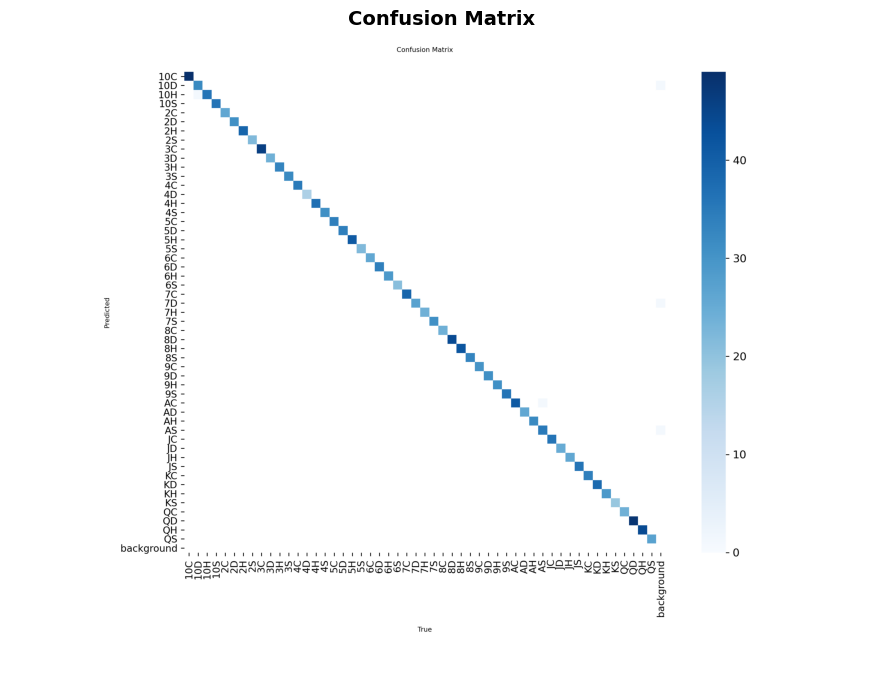

In [8]:
results_dir = Path(f'runs/detect/{RUN_NAME}')

from PIL import Image
import matplotlib.pyplot as plt

plots = [
    ('results.png',                     'Training Curves'),
    ('confusion_matrix.png',            'Confusion Matrix'),
    ('confusion_matrix_normalized.png', 'Confusion Matrix (Normalized)'),
]

for filename, title in plots:
    img_path = results_dir / filename
    if img_path.exists():
        img = Image.open(img_path)
        plt.figure(figsize=(14, 7))
        plt.imshow(img)
        plt.axis('off')
        plt.title(title, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    else:
        print(f'⚠️  {title} tidak ditemukan: {img_path}')

In [14]:
best_model = YOLO(f'runs/detect/{RUN_NAME}/weights/best.pt')
metrics    = best_model.val(data=YAML_PATH, verbose=False)

print('=' * 50)
print('     HASIL EVALUASI MODEL CAPSA')
print('=' * 50)
print(f'  mAP50     : {metrics.box.map50:.4f}')
print(f'  mAP50-95  : {metrics.box.map:.4f}')
print(f'  Precision : {metrics.box.mp:.4f}')
print(f'  Recall    : {metrics.box.mr:.4f}')
print('=' * 50)

print('\n📋 Per-Class mAP50:')
for i, name in enumerate(CLASS_NAMES):
    score = metrics.box.maps[i] if i < len(metrics.box.maps) else 0
    bar   = '█' * int(score * 20)
    print(f' {name:20s}: {score:.4f}  {bar}')

Ultralytics 8.4.14  Python-3.12.3 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 4060, 8188MiB)
YOLOv12s summary (fused): 159 layers, 9,251,004 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 701.0218.8 MB/s, size: 75.3 KB)
val: Scanning D:\Purwadhika\JCAIEAH\Capstone\M4\dataset\valid\labels.cache... 420 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 420/420  0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 27/27 4.6it/s 5.9s0.2s
                   all        420       1680      0.997      0.998      0.995      0.968
Speed: 0.9ms preprocess, 9.9ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to D:\Purwadhika\JCAIEAH\Capstone\M4\Trainlocal\runs\detect\val3
     HASIL EVALUASI MODEL CAPSA
  mAP50     : 0.9950
  mAP50-95  : 0.9684
  Precision : 0.9971
  Recall    : 0.9980

📋 Per-Class mAP50:
 10C                 : 0.9699  ███████████████████
 10D                 : 0.

C:\Users\Uqi\AppData\Local\Temp\ipykernel_42768\3913656021.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


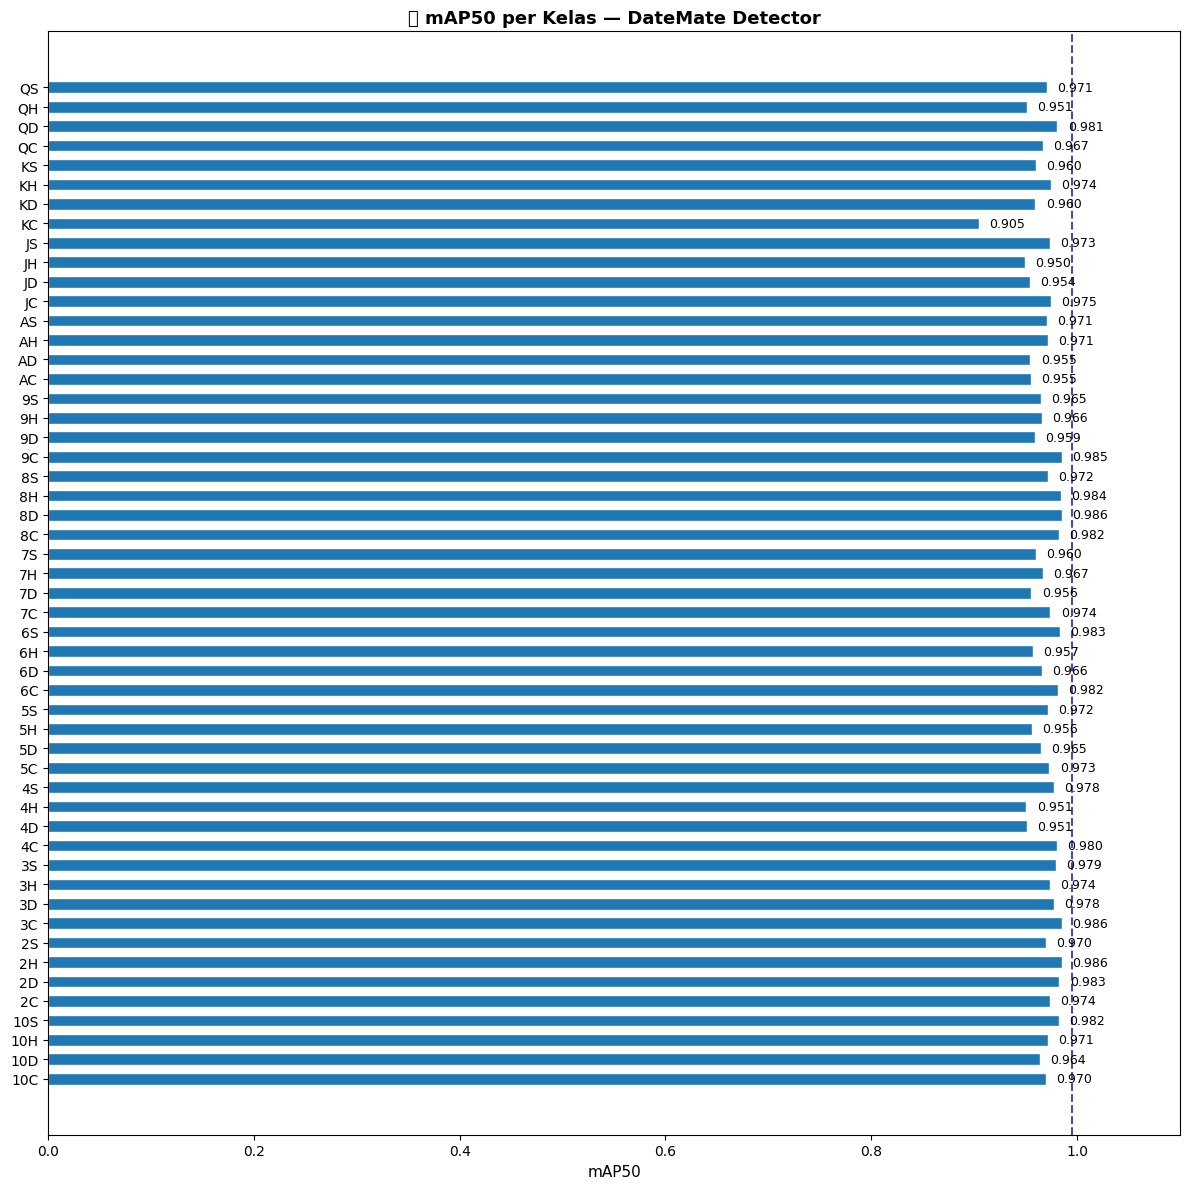

In [17]:
import matplotlib.patches as mpatches

class_maps = [metrics.box.maps[i] if i < len(metrics.box.maps) else 0
              for i in range(len(CLASS_NAMES))]

fig, ax = plt.subplots(figsize=(12, 12))
bars = ax.barh(CLASS_NAMES, class_maps, edgecolor='white', height=0.6)

for bar, val in zip(bars, class_maps):
    ax.text(val + 0.01, bar.get_y() + bar.get_height()/2,
            f'{val:.3f}', va='center', fontsize=9)

ax.set_xlim(0, 1.1)
ax.set_xlabel('mAP50', fontsize=11)
ax.set_title('📊 mAP50 per Kelas — DateMate Detector',
             fontsize=13, fontweight='bold')
ax.axvline(x=metrics.box.map50, color='navy', linestyle='--', alpha=0.7,
           label=f'Mean mAP50 = {metrics.box.map50:.3f}')

plt.tight_layout()
plt.show()

In [49]:
%pip install supervision

  Using cached supervision-0.27.0.post1-py3-none-any.whl.metadata (13 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached pydeprecate-0.4.0-py3-none-any.whl.metadata (21 kB)
Using cached supervision-0.27.0.post1-py3-none-any.whl (217 kB)
Using cached defusedxml-0.7.1-py2.py3-none-any.whl (25 kB)
Using cached pydeprecate-0.4.0-py3-none-any.whl (21 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
import supervision as sv
from supervision.metrics import MeanAveragePrecision

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=str(Path(DATASET_PATH) / 'test' / 'images'),
    annotations_directory_path=str(Path(DATASET_PATH) / 'test' / 'labels'),
    data_yaml_path=YAML_PATH
)

print(f'✅ Test set loaded: {len(ds)} gambar')
print(f'   Kelas: {ds.classes}')

predictions = []
targets     = []

print('\n🔍 Inferensi test set...')
for i, (_, image, target) in enumerate(ds):
    results    = best_model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)
    predictions.append(detections)
    targets.append(target)
    if (i + 1) % 10 == 0:
        print(f'   Progress: {i+1}/{len(ds)}')

map_result = MeanAveragePrecision().update(predictions, targets).compute()

print('\n' + '=' * 50)
print('    HASIL EVALUASI (SUPERVISION)')
print('=' * 50)
print(f'  mAP @ 0.50      : {map_result.map50:.4f}')
print(f'  mAP @ 0.75      : {map_result.map75:.4f}')
print(f'  mAP @ 0.50:0.95 : {map_result.map50_95:.4f}')
print('=' * 50)

✅ Test set loaded: 204 gambar
   Kelas: ['10C', '10D', '10H', '10S', '2C', '2D', '2H', '2S', '3C', '3D', '3H', '3S', '4C', '4D', '4H', '4S', '5C', '5D', '5H', '5S', '6C', '6D', '6H', '6S', '7C', '7D', '7H', '7S', '8C', '8D', '8H', '8S', '9C', '9D', '9H', '9S', 'AC', 'AD', 'AH', 'AS', 'JC', 'JD', 'JH', 'JS', 'KC', 'KD', 'KH', 'KS', 'QC', 'QD', 'QH', 'QS']

🔍 Inferensi test set...
   Progress: 10/204
   Progress: 20/204
   Progress: 30/204
   Progress: 40/204
   Progress: 50/204
   Progress: 60/204
   Progress: 70/204
   Progress: 80/204
   Progress: 90/204
   Progress: 100/204
   Progress: 110/204
   Progress: 120/204
   Progress: 130/204
   Progress: 140/204
   Progress: 150/204
   Progress: 160/204
   Progress: 170/204
   Progress: 180/204
   Progress: 190/204
   Progress: 200/204

    HASIL EVALUASI (SUPERVISION)
  mAP @ 0.50      : 1.0000
  mAP @ 0.75      : 1.0000
  mAP @ 0.50:0.95 : 0.9701


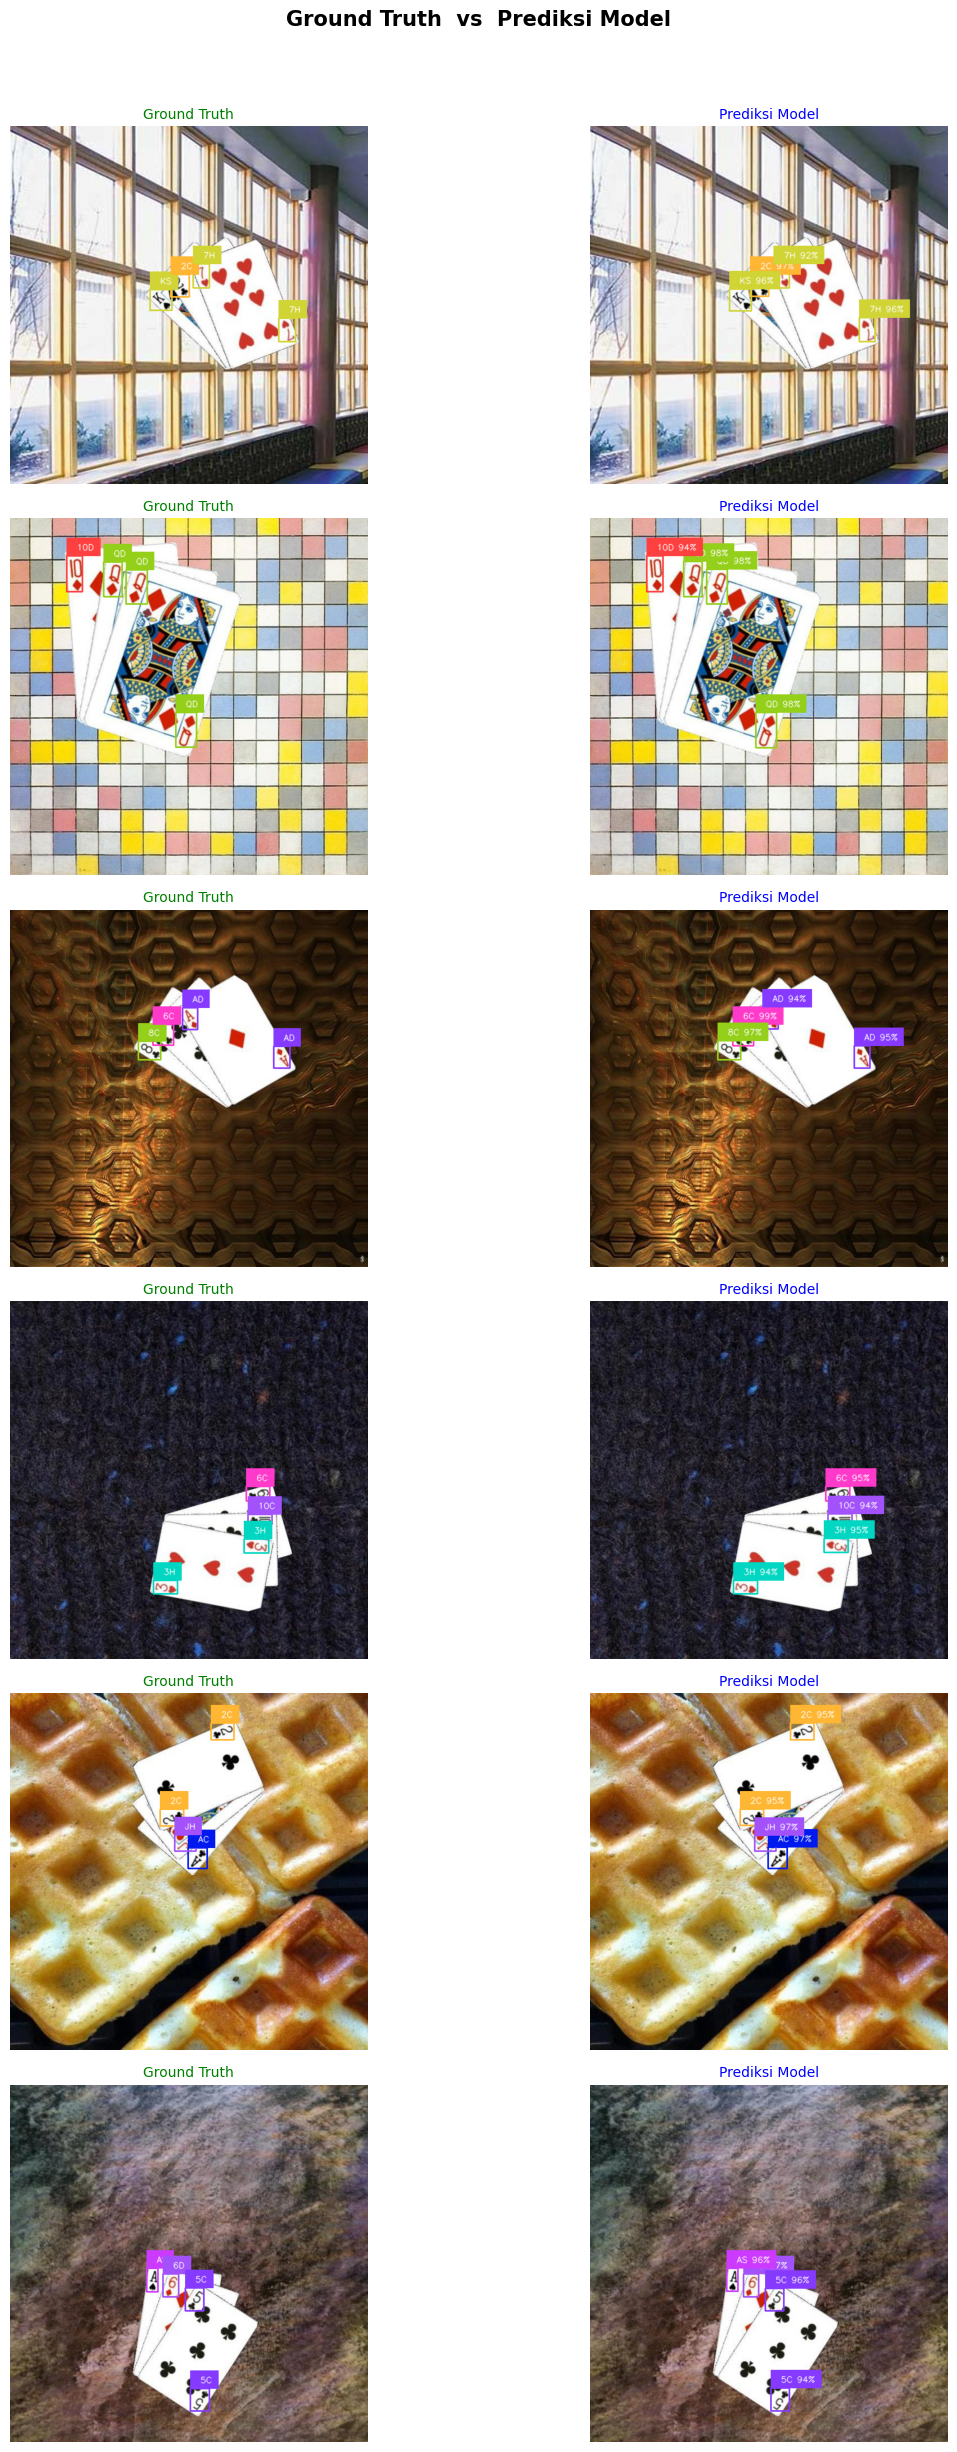

In [24]:
import random 
import cv2
import matplotlib.pyplot as plt
import supervision as sv

def visualize_predictions(ds, model, n_samples=6, conf=0.25):
    indices = random.sample(range(len(ds)), min(n_samples, len(ds)))

    fig, axes = plt.subplots(n_samples, 2, figsize=(14, n_samples * 4))
    fig.suptitle('Ground Truth  vs  Prediksi Model',
                 fontsize=15, fontweight='bold', y=1.02)
    plt.subplots_adjust(top=0.95, hspace=0.3)

    box_annotator   = sv.BoxAnnotator(thickness=2)
    label_annotator = sv.LabelAnnotator(text_scale=0.5, text_thickness=1)

    for row, idx in enumerate(indices):
        _, image, gt_detections = ds[idx]
        results         = model(image, conf=conf, verbose=False)[0]
        pred_detections = sv.Detections.from_ultralytics(results)

        # Ground Truth
        gt_labels = [
            f" {ds.classes[c]}"
            for c in gt_detections.class_id
        ]
        gt_image = box_annotator.annotate(image.copy(), gt_detections)
        gt_image = label_annotator.annotate(gt_image, gt_detections, labels=gt_labels)

        # Prediksi
        pred_labels = [
            f" {ds.classes[c]} {cf:.0%}"
            for c, cf in zip(pred_detections.class_id, pred_detections.confidence)
        ]
        pred_image = box_annotator.annotate(image.copy(), pred_detections)
        pred_image = label_annotator.annotate(pred_image, pred_detections, labels=pred_labels)

        axes[row, 0].imshow(cv2.cvtColor(gt_image,   cv2.COLOR_BGR2RGB))
        axes[row, 0].set_title('Ground Truth',    fontsize=10, color='green')
        axes[row, 0].axis('off')

        axes[row, 1].imshow(cv2.cvtColor(pred_image, cv2.COLOR_BGR2RGB))
        axes[row, 1].set_title('Prediksi Model', fontsize=10, color='blue')
        axes[row, 1].axis('off')

    plt.tight_layout()
    plt.show()

visualize_predictions(ds, best_model, n_samples=6)

In [26]:
import shutil

save_dir = Path(MODEL_SAVE_DIR)
save_dir.mkdir(parents=True, exist_ok=True)

best_pt = Path(f'runs/detect/{RUN_NAME}/weights/best.pt')
last_pt = Path(f'runs/detect/{RUN_NAME}/weights/last.pt')

if best_pt.exists():
    dst  = save_dir / 'best_Capsa.pt'
    shutil.copy(best_pt, dst)
    size = dst.stat().st_size / 1024**2
    print(f'✅ best.pt disimpan : {dst}')

if last_pt.exists():
    shutil.copy(last_pt, save_dir / 'last_Capsa.pt')
    print(f'✅ last.pt disimpan : {save_dir / "last_Capsa.pt"}')

print()
print('=' * 50)
print('  ✅ TRAINING PIPELINE SELESAI!')
print(f'  Model tersimpan di:')
print(f'  {save_dir}')
print('=' * 50)

✅ best.pt disimpan : D:\Purwadhika\JCAIEAH\Capstone\M4\Trainlocal\models\best_Capsa.pt
✅ last.pt disimpan : D:\Purwadhika\JCAIEAH\Capstone\M4\Trainlocal\models\last_Capsa.pt

  ✅ TRAINING PIPELINE SELESAI!
  Model tersimpan di:
  D:\Purwadhika\JCAIEAH\Capstone\M4\Trainlocal\models
